## Name    : Charan Kattamanchi 
## Unid      : U1385123
## Subject : Capstone Project
## Project  : Predicting Customer Success -- Swire Coca Cola

In [1]:
## Contents
### 1. Business Problem Statement
### 2. Exploratory Data Analysis
### 3. Modelling

# 1. Business Problem Statement

>Approximately, Swire Coca-Cola’s 10% of the business is 'Business2Business'.Predicting thesuccess/profitability/sales of a new restaurants in the market will improve to make informed decisions about pricing and funding for these businesses.Swire Coca-Cola needs to improve their ability to predict the popularity, longevity, and total 3-year sales volume of new restaurant customers in order to achieve this. With this company can make more effective decisions about pricing and funding for these businesses which results in a greater return on investment for the company, and also it creates more loyal and valuable customers.

>The analytics approach to solve the problem involve the use of historical data to train the model and to make 
predictions about the new customers.The dashboard will be designed to provide an easy-to-use interface for stakeholders to access the predictions and explore the insights.The scope of the project will include the development
of a machine learning model to predict popularity, longevity, and total 3-year sales volume of new restaurantcustomers
and a dashboard to provide insights and visualization of the predictions.

>Stakeholders will judge the success of the project based on the accuracy of the predictions and the effectiveness of 
the dashboard in providing insights and visualization of the predictions. Specifically, the overall performance of the
solution in terms of its ability to predict popularity, longevity, and total 3-year sales volume.

>The project will be executed by a team of four data analysts within the MSBA department. The project will becompleted by April 10, with important milestones , including Exploratory Data Analysis by February 19th, model development by March 19th,  and final deliverables by April 2nd.

# 2. Exploratory Data Analysis

## Libraries and output Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import xlrd

In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [4]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale = 1)

In [5]:
!pip install pyxlsb

## Loading & Understanding  Data

In [6]:
#Loading data
cust_df = pd.read_excel("/Users/charankattamanchi/Desktop/Capstonecompletion/FSOP_Customer_Data_v2.0.xlsb",engine='pyxlsb')
sales_df = pd.read_excel("/Users/charankattamanchi/Desktop/Capstonecompletion/FSOP_Sales_Data_v2.0.xlsb",engine='pyxlsb')

In [7]:
cust_df.shape

(40386, 16)

In [8]:
cust_df.columns

Index(['CUSTOMER_NUMBER_BLINDED', 'SALES_OFFICE_DESCRIPTION',
       'DELIVERY_PLANT_DESCRIPTION', 'ON_BOARDING_DATE', 'ADDRESS_CITY',
       'ADDRESS_ZIP_CODE', 'COUNTY', 'GEO_LONGITUDE', 'GEO_LATITUDE',
       'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION',
       'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION',
       'BUSINESS_TYPE_EXTENSION_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2', 'MARKET_DESCRIPTION',
       'COLD_DRINK_CHANNEL_DESCRIPTION'],
      dtype='object')

In [9]:
cust_df.dtypes

CUSTOMER_NUMBER_BLINDED                   object
SALES_OFFICE_DESCRIPTION                  object
DELIVERY_PLANT_DESCRIPTION                object
ON_BOARDING_DATE                           int64
ADDRESS_CITY                              object
                                           ...  
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    object
BUSINESS_TYPE_EXTENSION_DESCRIPTION       object
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       object
MARKET_DESCRIPTION                        object
COLD_DRINK_CHANNEL_DESCRIPTION            object
Length: 16, dtype: object

In [10]:
cust_df.head()

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL


In [11]:
cust_df['CUSTOMER_NUMBER_BLINDED'].nunique()

40386

In [12]:
cust_df.isnull().sum()

CUSTOMER_NUMBER_BLINDED                   0
SALES_OFFICE_DESCRIPTION                  0
DELIVERY_PLANT_DESCRIPTION                0
ON_BOARDING_DATE                          0
ADDRESS_CITY                              0
                                         ..
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    0
BUSINESS_TYPE_EXTENSION_DESCRIPTION       0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       0
MARKET_DESCRIPTION                        0
COLD_DRINK_CHANNEL_DESCRIPTION            0
Length: 16, dtype: int64

>There two county names which are blank. When i explored the sales data for this two it is neglisible. 
On top of it among 40k customers and 0.8 million rows in sales data it is ignored.

In [13]:
sales_df.isnull().sum()

CUSTOMER_NUMBER_BLINDED        0
PRODUCT_SOLD_BLINDED           0
BEV_CAT_DESC               73623
CALORIE_CAT_DESC           73623
PACK_TYPE_DESC                 0
                           ...  
GROSS_PROFIT_DEAD_NET          0
COGS                           0
MIN_POSTING_DATE               0
MAX_POSTING_DATE               0
NUM_OF_TRANSACTIONS            0
Length: 15, dtype: int64

>Addressing NAs in the Sales_df Column: There are 73623 rows where both the cells are blank. Columns like Bev_cat_desc, Calotie_Cat_desc etc talks about product preference by customer.Our use case is not to find the purchasing patterns by product types which are liked by the customer.Apart from this when i digged deeply about these rows , majority of the rows speaks about paper cup with different sizes, Co2 tank etc.Hence ignoring the Nas and not exploring the Columns which are related to product type or category.


## Understanding Customer business types

In [14]:
cust_df['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'].nunique()

8

In [15]:
cust_df['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'].unique()

array(['Other Shopping & Ser', 'Eating & Drinking',
       'Travel/Transportatio', 'Third Party (Non-Con',
       'Entertainment/Recrea', 'Grocery Shopping', 'At-Work',
       'Educational'], dtype=object)

In [16]:
cust_df['CUSTOMER_TRADE_CHANNEL_DESCRIPTION'].nunique()

25

In [17]:
cust_df['COLD_DRINK_CHANNEL_DESCRIPTION'].unique()

array(['RETAIL', 'EATING/DRINKING', 'LODGING', 'WHOLESALE',
       'DESTINATION VENUE', 'AT WORK', "GOV'T/EDU", 'HEALTH/HOSPITAL',
       'NON COLD DRINK'], dtype=object)

In [18]:
cust_df['COLD_DRINK_CHANNEL_DESCRIPTION'].unique()

array(['RETAIL', 'EATING/DRINKING', 'LODGING', 'WHOLESALE',
       'DESTINATION VENUE', 'AT WORK', "GOV'T/EDU", 'HEALTH/HOSPITAL',
       'NON COLD DRINK'], dtype=object)

>Among all the columns about type of activities (Ex.CUSTOMER_TRADE_CHANNEL_DESCRIPTION, CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION, BUSINESS_TYPE_EXTENSION_DESCRIPTION, MARKET_DESCRIPTION, COLD_DRINK_CHANNEL_DESCRIPTION) in the customer data, Customer_Activity_Cluster_description (8 unique values) will be used to divide the customer based on type of business.

## Sales Data

In [19]:
sales_df.head()

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,1112.73,682.41,44208,44925,157
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.0,1197.12,1666.92,1468.77,316.19,1185.98,44229,44925,40
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.0,3429.00,1755.00,1499.03,403.25,1107.73,44627,44925,62
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.0,307.12,592.88,553.18,77.90,475.28,44721,44925,17
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.0,3382.05,2077.95,1812.90,661.21,1416.99,44201,44925,166


In [20]:
sales_df.dtypes

CUSTOMER_NUMBER_BLINDED     object
PRODUCT_SOLD_BLINDED        object
BEV_CAT_DESC                object
CALORIE_CAT_DESC            object
PACK_TYPE_DESC              object
                            ...   
GROSS_PROFIT_DEAD_NET      float64
COGS                       float64
MIN_POSTING_DATE             int64
MAX_POSTING_DATE             int64
NUM_OF_TRANSACTIONS          int64
Length: 15, dtype: object

In [21]:
sales_df.shape

(831858, 15)

In [22]:
sales_df['CUSTOMER_NUMBER_BLINDED'].nunique()

40390

In [23]:
sales_df.columns 

Index(['CUSTOMER_NUMBER_BLINDED', 'PRODUCT_SOLD_BLINDED', 'BEV_CAT_DESC',
       'CALORIE_CAT_DESC', 'PACK_TYPE_DESC',
       'PACK_SIZE_SALES_UNIT_DESCRIPTION', 'PHYSICAL_VOLUME', 'DISCOUNT',
       'INVOICE_PRICE', 'DEAD_NET', 'GROSS_PROFIT_DEAD_NET', 'COGS',
       'MIN_POSTING_DATE', 'MAX_POSTING_DATE', 'NUM_OF_TRANSACTIONS'],
      dtype='object')

## Creating State Column From Sales_office_Description

In [24]:
cust_df["STATE"] = cust_df["SALES_OFFICE_DESCRIPTION"].apply(lambda x: x.split(",")[1])

In [25]:
cust_df

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,STATE
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL,AZ
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING,WA
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL,WA
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING,AZ
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40381,C0969054506370153,"Johnstown, CO","Johnstown, CO",43486,GREELEY,80631-9529,WELD,-104.677498,40.429684,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE,CO
40382,C0826029007880667,"Tempe, AZ","Tempe, AZ",43353,CHANDLER,85224-2878,MARICOPA,-111.859055,33.338470,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE,AZ
40383,C0720037102950022,"Albuquerque, NM","Albuquerque, NM",42991,ALBUQUERQUE,87113-1554,BERNALILLO,-106.597680,35.184660,Entertainment/Recrea,Recreation,Other Recreation,Spcl Evnt: One Time,Recreation,FSOP,DESTINATION VENUE,NM
40384,C0285043409270577,"Draper, UT","Draper, UT",40140,SALT LAKE CITY,84104,SALT LAKE,-111.974670,40.749605,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL,UT


## Understanding Swire Sales office locations

In [26]:
#Total number of Swire Sales offices
cust_df['SALES_OFFICE_DESCRIPTION'].nunique()

44

In [27]:
# Names of sales office
cust_df['SALES_OFFICE_DESCRIPTION'].unique()

array(['Tucson, AZ', 'Tacoma, WA', 'Walla Walla, WA', 'Prescott, AZ',
       'Reno, NV', 'Albuquerque, NM', 'Denver, CO', 'Tempe, AZ',
       'Wilsonville, OR', 'Eugene, OR', 'Ogden, UT', 'Bellevue, WA',
       'Flagstaff, AZ', 'Draper, UT', 'Johnstown, CO',
       'Grand Junction, CO', 'Arlington, WA', 'Colorado Springs, CO',
       'Bend, OR', 'Twin Falls, ID', 'Huachuca City, AZ', 'Boise, ID',
       'Logan, UT', 'Spokane, WA', 'Alamosa, CO', 'Glendale, AZ',
       'Yuma, AZ', 'Kingman, AZ', 'Pueblo, CO', 'Elko, NV',
       'Lewiston, ID', 'Bremerton, WA', 'Wenatchee, WA',
       'Scottsbluff, NE', 'Pocatello, ID', 'Idaho Falls, ID', 'Price, UT',
       'Richfield, UT', 'Show Low, AZ', 'Glenwood Springs, CO',
       'Chinle, AZ', 'Cheyenne, WY', 'LaGrande, OR', 'Pendleton, OR'],
      dtype=object)

In [28]:
#Total number of states in the given data
cust_df['STATE'].nunique()

10

In [29]:
#Names of states in the given data
cust_df['STATE'].unique()

array([' AZ', ' WA', ' NV', ' NM', ' CO', ' OR', ' UT', ' ID', ' NE',
       ' WY'], dtype=object)

>Swire sales data is spread across 10 states and it has 44 sales offices located in this states.

## Understanding Swire customer locations

In [30]:
#Total number of Counties
cust_df['COUNTY'].nunique()

247

In [31]:
#Total number of cities
cust_df['ADDRESS_CITY'].nunique() 

1361

In [32]:
##addressing the issue--same ADDRESS_CITY in different county
cust_df[['COUNTY', 'ADDRESS_CITY']].value_counts().reset_index(name='count')

,COUNTY,ADDRESS_CITY,count
0,MARICOPA,PHOENIX,1628
1,BERNALILLO,ALBUQUERQUE,1166
2,SALT LAKE,SALT LAKE CITY,1149
3,PIMA,TUCSON,1040
4,KING,SEATTLE,1019
...,...,...,...
1569,LOS ANGELES,WHITTIER,1
1570,LYON,SMITH,1
1571,MARICOPA,LUKE AFB,1
1572,MARICOPA,NEW RIVER,1


In [33]:
##addressing the issue--same county name in different states
cust_df[['STATE', 'COUNTY']].value_counts().reset_index(name='count')

,STATE,COUNTY,count
0,AZ,MARICOPA,5016
1,UT,SALT LAKE,2673
2,WA,KING,2535
3,NM,BERNALILLO,1211
4,WA,PIERCE,1173
...,...,...,...
286,UT,DALLAS,1
287,WA,FRANKLIN,1
288,ID,KOOTENAI,1
289,ID,GARFIELD,1


> From all the columns about location in the data set, created State column using Sales office description. Found few counties names which are in different states. Hence Counties will always be used together with State. Issue is same with cities also. Hence if using we need to consider State, County,City together i.e all those columns. Example from Data : Adams County is in  Idaho, Denver,Washington states.Infact in USA a lot of states have county by this name. In some applications using Latitude and Longitude will be helpful.

>Tried to find customer reviews using Latitude and Longitude. For few i was able to find reviews and for few it is not available. Even if i get those reviews we dont know whether i.e. related to our customer or some other business activity in that location. Hence dropped that idea.


## Potential Target variables

>Checked the data in clusters( Example : Discount , Invoice price,Dead net,Gross Profit Dead net , Cogs about price)and Targetted few variable and explored.
> 1. Invoice Price
>2. Number of Transactions
>3. Physical Volume
>4. Onbarding date to predict longevity
>5. Latitude and Longitude for Customer Reviews

> 1.Revenue associated columns: Among the Discount , Invoice price,Dead net,Gross Profit Dead net , Cogs --Invoice price Speaks about the revenue. All other column are after doing some deductions from the revenue. I.e. Discount, 
Cost of goods sold, Profit earned,Advertising cost etc. All these are depend on lot of business decisions at macro and microlevel.These factors doens help in precting the customer Success.Infact Discount will be given based on Customer 
success not the other way around.Hence not exploring any other column except invoice price among them.

> 2.Number of transactions: When i checked the data the number of transaction are based on product wise and it cannot be used as target variable . Ex. one customer ordered 5 different products on a single day.In the data it is noted as 5 transactions.In a business scenario the customer will always order together on a single day, sometime in rare scenario it is possible but not most of the times.Infact this issue is also not addressed in the Data.

>3.Physical Volume : Physical volume alone cant be considered as a target variable.
PS:Iam still working on the issues associated with the Physical volume.If i can crack it i would like to share the
idea with you asap.But as a team we will be working on the other aspects for the presentation.

>4.Latitude and Longitude for Customer Reviews:Tried to find customer reviews using Latitude and Longitude.
For few i was able to find reviews and for few it is not available. Even if i get those reviews we dont know whether
the reviews are related to our customer or some other business activity in that location. Hence dropped that idea.

>5.Onbaording date to Predict Longevity: Working on it by creating a new column age based on onboarding date.Exploring the possibilities.

>Target variable : Invoice Price. I.e Renamed and used as Revenue. 

## Sum of revenue by customer

In [34]:
customer_revenue = sales_df.groupby(by="CUSTOMER_NUMBER_BLINDED")["INVOICE_PRICE"].sum().reset_index()

In [35]:
customer_revenue.rename(columns={"INVOICE_PRICE":"REVENUE"},inplace=True)

In [36]:
customer_revenue

,CUSTOMER_NUMBER_BLINDED,REVENUE
0,C0001004007230617,0.00
1,C0001004306830869,0.00
2,C0001005009010198,932.52
3,C0001006902500643,6478.18
4,C0001007600510372,2739.92
...,...,...
40385,C1000079908000761,2548.34
40386,C1000080305620923,22994.62
40387,C1000080509070822,2896.06
40388,C1000084502460358,10864.98


In [37]:
#Merging Revenue with Customer data
cust_final = customer_revenue.merge(cust_df, on="CUSTOMER_NUMBER_BLINDED", how = "left")

## Total Revenue by Customer_activity_cluster_Description

In [38]:
#Exploring revenue by custome business activity
cust_activitycluster_revenue = cust_final.groupby(by="CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION")["REVENUE"].sum().reset_index()

In [39]:
cust_activitycluster_revenue 

,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,REVENUE
0,At-Work,4.956044e+07
1,Eating & Drinking,2.022769e+08
2,Educational,2.759857e+07
3,Entertainment/Recrea,8.717158e+07
4,Grocery Shopping,3.470118e+07
5,Other Shopping & Ser,9.448466e+07
6,Third Party (Non-Con,2.205718e+08
7,Travel/Transportatio,5.429596e+07


<AxesSubplot:xlabel='REVENUE', ylabel='CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'>

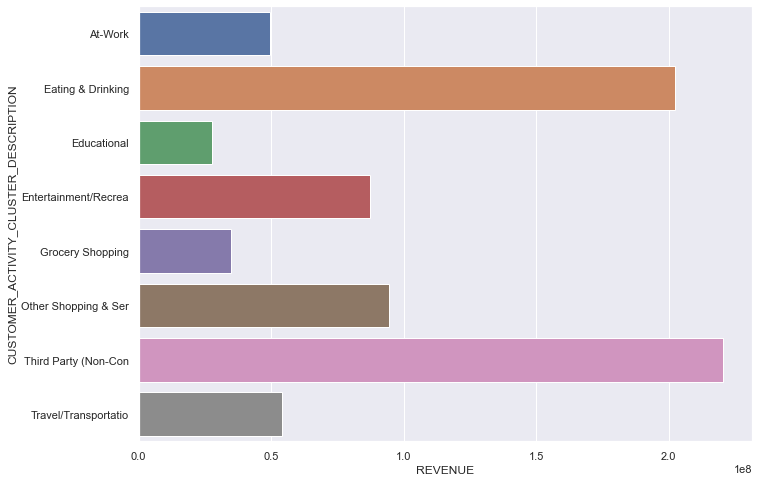

In [40]:
sns.barplot(x = 'REVENUE',
            y = 'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION',
            data = cust_activitycluster_revenue)

## Total Revenue by COLD_DRINK_CHANNEL_DESCRIPTION

In [41]:
cust_channel_revenue = cust_final.groupby(by="COLD_DRINK_CHANNEL_DESCRIPTION")["REVENUE"].sum().reset_index()

In [42]:
cust_channel_revenue

,COLD_DRINK_CHANNEL_DESCRIPTION,REVENUE
0,AT WORK,4.235770e+07
1,DESTINATION VENUE,8.534496e+07
2,EATING/DRINKING,2.025255e+08
3,GOV'T/EDU,3.999199e+07
4,HEALTH/HOSPITAL,3.075212e+07
5,LODGING,2.085482e+07
6,NON COLD DRINK,4.492018e+05
7,RETAIL,1.008605e+08
8,WHOLESALE,2.475242e+08


<AxesSubplot:xlabel='REVENUE', ylabel='COLD_DRINK_CHANNEL_DESCRIPTION'>

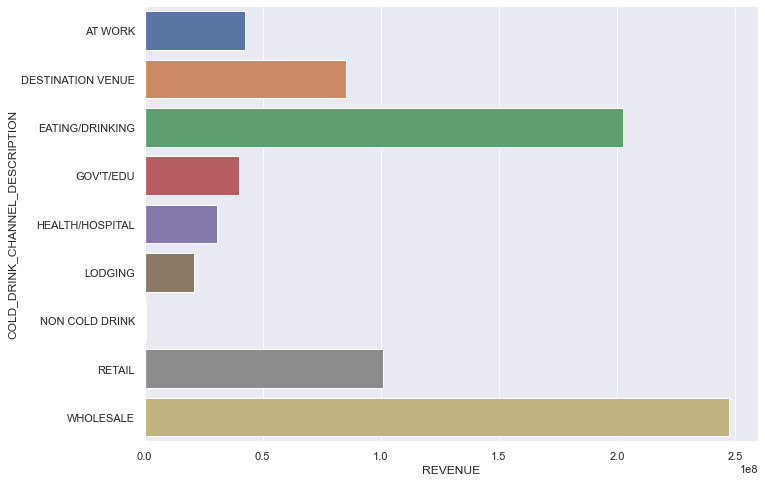

In [43]:
sns.barplot(x = 'REVENUE',
            y = 'COLD_DRINK_CHANNEL_DESCRIPTION',
            data = cust_channel_revenue)

## Customer revenue Across states 

In [44]:
cust_revenue_state = cust_final.groupby(by="STATE")["REVENUE"].sum().reset_index()

In [45]:
cust_revenue_state

,STATE,REVENUE
0,AZ,1.939843e+08
1,CO,1.280964e+08
2,ID,5.194862e+07
3,NE,2.349807e+06
4,NM,2.553488e+07
5,NV,2.634917e+07
6,OR,7.219116e+07
7,UT,1.319254e+08
8,WA,1.345721e+08
9,WY,3.709237e+06


<AxesSubplot:xlabel='STATE', ylabel='REVENUE'>

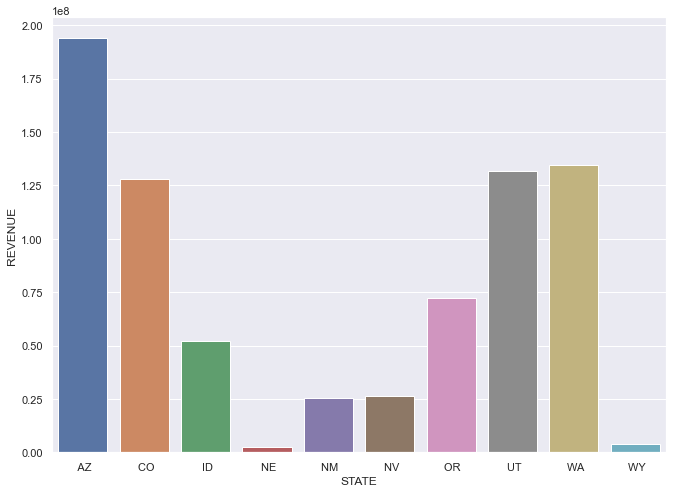

In [46]:
sns.barplot(y = 'REVENUE',
            x = 'STATE',
            data = cust_revenue_state)

In [47]:
cust_final_subset = cust_final[["CUSTOMER_NUMBER_BLINDED","ADDRESS_CITY","COUNTY","CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION","CUSTOMER_TRADE_CHANNEL_DESCRIPTION","CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION","BUSINESS_TYPE_EXTENSION_DESCRIPTION","CUSTOMER_TRADE_CHANNEL_DESCRIPTION2","MARKET_DESCRIPTION","COLD_DRINK_CHANNEL_DESCRIPTION","STATE","REVENUE"]]

In [48]:
cust_final_subset

,CUSTOMER_NUMBER_BLINDED,ADDRESS_CITY,COUNTY,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,STATE,REVENUE
0,C0001004007230617,SPARKS,WASHOE,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE,NV,0.00
1,C0001004306830869,RENO,WASHOE,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE,NV,0.00
2,C0001005009010198,EDMONDS,SNOHOMISH,Eating & Drinking,Other Eating & Drink,Other Eating & Drink,DSD,Other Eating & Drink,FSOP,EATING/DRINKING,WA,932.52
3,C0001006902500643,LONGVIEW,COWLITZ,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL,OR,6478.18
4,C0001007600510372,SPARKS,WASHOE,Eating & Drinking,Bar/Tavern/Licensed,Other Bar/Tavern/Lic,DSD,Bar/Tavern/Licensed,FSOP,EATING/DRINKING,NV,2739.92
...,...,...,...,...,...,...,...,...,...,...,...,...
40385,C1000079908000761,MOAB,GRAND,Eating & Drinking,Full Service Restaur,FSR-All Other,DSD,Full Service Restaur,FSOP,EATING/DRINKING,UT,2548.34
40386,C1000080305620923,OREGON CITY,CLACKAMAS,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL,OR,22994.62
40387,C1000080509070822,SEATTLE,KING,Eating & Drinking,Full Service Restaur,FSR-All Other,DSD,Full Service Restaur,FSOP,EATING/DRINKING,WA,2896.06
40388,C1000084502460358,MONROE,SNOHOMISH,Eating & Drinking,Full Service Restaur,FSR-All Other,DSD,Full Service Restaur,FSOP,EATING/DRINKING,WA,10864.98


In [79]:
cust_final_subset['REVENUE'].describe().apply(lambda x: format(x, 'f'))

count      40390.000000
mean       19081.019563
std       122090.010102
min       -70583.320000
25%          727.097500
50%         3721.255000
75%        12203.800000
max      7181257.910000
Name: REVENUE, dtype: object

# EDA Results/Overview

>Performed Exploratory Data Analysis (EDA) on the Swire Coca-Cola customer and salesdata. 

>The EDA includes the following steps:

>Imported the necessary libraries and Imported the customer and sales data files into Pandas data frames.Checked the
dimensions of each data frame and previewed the data to understand it better.

>Addressing NAs in the Sales_df Column:Checked for missing values in each data frame using the isnull().sum()function. There are 73623 rows where both the cells are blank. Columns like Bev_cat_desc, Calotie_Cat_desc etc talks about product preference by customer.Our use case is not to find the purchasing patterns by product types which are liked by the customer.Apart from this when i digged deeply about these rows , majority of the rows speaks about paper cup with different sizes, Co2 tank etc.Hence ignoring the Nas and not exploring the Columns which are related to product type or category. There two county names which are blank. When i explored the sales data for this two it is neglisible. 
On top of it among 40k customers and 0.8 million rows in sales data it is ignored.

>Understanding Customer Business Type: Explored all the columns about type of activities (Ex.CUSTOMER_TRADE_CHANNEL_DESCRIPTION, CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION, BUSINESS_TYPE_EXTENSION_DESCRIPTION, MARKET_DESCRIPTION, COLD_DRINK_CHANNEL_DESCRIPTION) in the customer data Customer_Activity_Cluster_description (8 unique values) will be used to divide the customer type of business.

>Understanding Swire customer and Sales office locations : Explored Sales_office_description,County, Address City, Latitude & Longitude and Created State column. Swire sales data is spread across 10 states and it has 44 sales offices located in this states.Swire customers are located in 10 states and 290 counties and 1574 cities. Addressed the issue of same county name in different states.

>Checked the data in clusters( Example : Discount , Invoice price,Dead net,Gross Profit Dead net , Cogs about price)and Targetted few variable and explored.
> 1. Invoice Price
>2. Number of Transactions
>3. Physical Volume
>4. Onbarding date to predict longevity
>5. Latitude and Longitude for Customer Reviews

> 1.Revenue associated columns: Among the Discount , Invoice price,Dead net,Gross Profit Dead net , Cogs --Invoice price Speaks about the revenue. All other column are after doing some deductions from the revenue. I.e. Discount, 
Cost of goods sold, Profit earned,Advertising cost etc. All these are depend on lot of business decisions at macro and microlevel.These factors doens help in precting the customer Success.Infact Discount will be given based on Customer 
success not the other way around.Hence not exploring any other column except invoice price among them.

> 2.Number of transactions: When i checked the data the number of transaction are based on product wise and it cannot be used as target variable . Ex. one customer ordered 5 different products on a single day.In the data it is noted as 5 transactions.In a business scenario the customer will always order together on a single day, sometime in rare scenario it is possible but not most of the times.Infact this issue is also not addressed in the Data.

>3.Physical Volume : Physical volume alone cant be considered as a target variable.
PS:Iam still working on the issues associated with the Physical volume.If i can crack it i would like to share the
idea with you asap.But as a team we will be working on the other aspects for the presentation.

>4.Onbaording date to Predict Longevity: Working on it by creating a new column age based on onboarding date.Exploring the possibilities.

>5.Latitude and Longitude for Customer Reviews:Tried to find customer reviews using Latitude and Longitude.
For few i was able to find reviews and for few it is not available. Even if i get those reviews we dont know whether
the reviews are related to our customer or some other business activity in that location. Hence dropped that idea.

>Target variable : Invoice Price. I.e Renamed and used as Revenue. 

>Explored Customer_activity_cluster_description , State wide, County wide, City wide  absed on Revenue.

# 3.Modelling

### Modeling Process - Candidate Models :
>1. Forecast 2. Decision Tree Regressor

### Modeling Process - Model Selection : 
>I decided to have a decision tree regressor for this particular case because the prediction has to be about sales. Initially I considered to have two models. One is a forecasting model and the other is a regressor model. But, for forecasting, there are not enough dates and there was only min_posting_date and max_posting_date with cumulative transactions for customers during these dates. This will not be an efficient way for a forecast model so instead, I decided on taking a regressor model. For this decision tree regressor, I have used MAE.

### Modeling Process - Cross Validation :
>I used 25% of the data for test and 75% used it for training purposes. I split the data using train test split to split the data into training x labels and y labels and testing x labels and y labels. 

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [50]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [51]:
cust_final_subset_v1 = MultiColumnLabelEncoder(columns = ["ADDRESS_CITY","COUNTY","CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION","CUSTOMER_TRADE_CHANNEL_DESCRIPTION","CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION","BUSINESS_TYPE_EXTENSION_DESCRIPTION","CUSTOMER_TRADE_CHANNEL_DESCRIPTION2","MARKET_DESCRIPTION","COLD_DRINK_CHANNEL_DESCRIPTION","STATE"]).fit_transform(cust_final_subset)

In [52]:
cust_final_subset_v1

,CUSTOMER_NUMBER_BLINDED,ADDRESS_CITY,COUNTY,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,STATE,REVENUE
0,C0001004007230617,1138,237,6,0,2,9,0,0,8,5,0.00
1,C0001004306830869,992,237,6,0,2,9,0,0,8,5,0.00
2,C0001005009010198,329,209,1,15,23,4,15,1,2,8,932.52
3,C0001006902500643,665,54,5,2,19,4,2,1,7,6,6478.18
4,C0001007600510372,1138,237,1,3,20,4,3,1,2,5,2739.92
...,...,...,...,...,...,...,...,...,...,...,...,...
40385,C1000079908000761,760,91,1,7,11,4,7,1,2,7,2548.34
40386,C1000080305620923,871,41,5,8,24,4,8,1,7,6,22994.62
40387,C1000080509070822,1074,112,1,7,11,4,7,1,2,8,2896.06
40388,C1000084502460358,767,209,1,7,11,4,7,1,2,8,10864.98


## Train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
cust_final_subset_v1.reset_index(drop=True, inplace=True)

In [55]:
X = cust_final_subset_v1.drop(["CUSTOMER_NUMBER_BLINDED","REVENUE"], axis=1)

In [56]:
y = cust_final_subset_v1["REVENUE"]

In [57]:
y.isna().sum()

0

In [58]:
X.max()

ADDRESS_CITY                              1361
COUNTY                                     247
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION        8
CUSTOMER_TRADE_CHANNEL_DESCRIPTION          25
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION      48
BUSINESS_TYPE_EXTENSION_DESCRIPTION         12
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2         25
MARKET_DESCRIPTION                           3
COLD_DRINK_CHANNEL_DESCRIPTION               9
STATE                                       10
dtype: int64

In [59]:
X = X.fillna(5000)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model building

In [61]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Testing

In [62]:
y_pred = regressor.predict(X_test)

In [63]:
y_pred = y_pred.T

In [64]:
y_pred

array([20923.9825    ,     0.        ,     0.        , ...,
           0.        ,  5447.26666667, 22054.14      ])

In [65]:
y_test

33116     7318.73
6049         0.00
17224        0.00
23972    13048.14
15672     3585.66
           ...   
35831    28729.19
17795     1899.04
18628        0.00
18579     3627.48
841       2319.50
Name: REVENUE, Length: 10098, dtype: float64

In [66]:
regressor.score(X_test, y_test)

-0.06852088813643209

In [67]:
final_pred = pd.DataFrame([y_pred,y_test])

In [68]:
final_pred = final_pred.T

In [69]:
final_pred.rename(columns={0:"predicted_value", 1:"actual_value"}, inplace = True)

In [70]:
final_pred

,predicted_value,actual_value
0,20923.982500,7318.73
1,0.000000,0.00
2,0.000000,0.00
3,9689.645714,13048.14
4,3750.560000,3585.66
...,...,...
10093,12269.364000,28729.19
10094,13517.856667,1899.04
10095,0.000000,0.00
10096,5447.266667,3627.48


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(final_pred["predicted_value"], final_pred["actual_value"])

print('MAE', mae)

MAE 22141.425271756834


### Modeling Process - Fine Tuning :
>I tried altering the min_leaf_nodes  and max_depth of the tree. The tweaks to hyperparameters resulted in a better MAE with a max_depth of the tree when taken as 10 

In [72]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressorTwo = DecisionTreeRegressor(random_state = 0, max_depth=10) 
  
# fit the regressor with X and Y data
regressorTwo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [73]:
y_predTwo = regressorTwo.predict(X_test)
y_predTwo = y_predTwo.T

In [74]:
final_predTwo = pd.DataFrame([y_predTwo,y_test])
final_predTwo = final_predTwo.T
final_predTwo.rename(columns={0:"predicted_value", 1:"actual_value"}, inplace = True)
maeTwo = mean_absolute_error(final_predTwo["predicted_value"], final_predTwo["actual_value"])

print('MAE', maeTwo)


MAE 20894.931422918577


In [75]:
final_predTwo

,predicted_value,actual_value
0,14003.140871,7318.73
1,9133.256810,0.00
2,27.877741,0.00
3,11366.782607,13048.14
4,5446.246370,3585.66
...,...,...
10093,48086.999162,28729.19
10094,11366.782607,1899.04
10095,596.780667,0.00
10096,5446.246370,3627.48


#### Modeling Process - Model Performance :
>The decision tree regressor is really fast as the data isn't a large chunk. Model is performing really fast on a 16GB machine and won't take more than a couple of minutes.

### Modeling Process - Model Performance :
>I created a data frame of the results. In the above cell where it says final_pred, we can see some of the actual values and some of the predicted values. For some cases, it was pretty close and for some it was too far.  Because there is a dearth of demographic and transactional data, the MAE was around 25k on average. 